In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/ref_data.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.035383,0.682562,0.631392,0.604122,0.593008,0.606561,0.541665,0.490245,0.541293,0.602763,...,0.000008,0.000010,0.000016,0.000037,0.000045,0.000034,0.000016,0.000007,7.018234e-07,N
1,0.171621,0.773267,0.720554,0.698526,0.675677,0.649336,0.561003,0.566162,0.627939,0.706442,...,0.000611,0.000619,0.000651,0.000671,0.000714,0.000662,0.000632,0.000636,6.285412e-04,N
2,0.036989,0.581158,0.648372,0.665474,0.574450,0.527603,0.569063,0.568006,0.440939,0.413963,...,0.000005,0.000005,0.000005,0.000002,0.000001,0.000001,0.000002,0.000002,3.452211e-07,N
3,0.069629,0.589378,0.541421,0.541959,0.586754,0.491672,0.464231,0.533424,0.623905,0.748939,...,0.000565,0.000386,0.000424,0.000616,0.000660,0.000487,0.000254,0.000090,5.960710e-06,N
4,0.170729,0.650319,0.608939,0.607158,0.633005,0.584595,0.527609,0.540251,0.621838,0.760092,...,0.000643,0.000473,0.000515,0.000710,0.000755,0.000571,0.000324,0.000174,8.189615e-05,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.177409,0.685879,0.688923,0.692181,0.695660,0.732018,0.726838,0.699215,0.664477,0.703567,...,0.003476,0.004130,0.003975,0.003647,0.003759,0.003958,0.003687,0.002704,2.190249e-03,P
1298,0.060417,0.741477,0.846064,0.677123,0.540445,0.546407,0.503164,0.497387,0.624307,0.665305,...,0.000683,0.000667,0.000452,0.000225,0.000215,0.000398,0.000448,0.000251,1.651544e-05,P
1299,0.061669,0.701292,0.650403,0.600404,0.643707,0.584001,0.512437,0.559121,0.596951,0.596030,...,0.000926,0.001583,0.002262,0.002180,0.001111,0.000833,0.001007,0.000629,4.519488e-05,P
1300,0.135363,0.732490,0.698547,0.730017,0.733110,0.664281,0.611099,0.649955,0.633053,0.671104,...,0.001099,0.001785,0.002457,0.002369,0.001336,0.001035,0.001215,0.000796,2.439616e-04,P


In [2]:
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-1].values  
y = df['labels'].values 

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1041, 162), (1041, 7), (261, 162), (261, 7))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1041, 162), (1041, 7), (261, 162), (261, 7))

In [6]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1041, 162, 1), (1041, 7), (261, 162, 1), (261, 7))

In [7]:
import keras
from keras import layers, models

input_dim = x_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim, 1)),
    layers.Conv1D(128, kernel_size=5, strides=1, activation='relu', padding='same'),
    layers.Dropout(0.3),

    layers.Conv1D(64, kernel_size=5, strides=1, activation='relu', padding='same'),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    
    layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 162, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 162, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,831 (1.43 MB)

 Trainable params: 373,831 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 50

In [10]:
rlrp = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)

history=model.fit(
    x_train, y_train, 
    batch_size=64, 
    epochs=epochs, 
    validation_data=(x_test, y_test),
    callbacks=[rlrp]
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2186 - loss: 1.8995 - val_accuracy: 0.3218 - val_loss: 1.7454 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3451 - loss: 1.6939 - val_accuracy: 0.3563 - val_loss: 1.6771 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3874 - loss: 1.5870 - val_accuracy: 0.4368 - val_loss: 1.5844 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4576 - loss: 1.4717 - val_accuracy: 0.4023 - val_loss: 1.5081 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5190 - loss: 1.3074 - val_accuracy: 0.4253 - val_loss: 1.4466 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5865 - loss: 1.1766 - val_accuracy: 0.4789 - val_loss: 1.3937 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5663 - loss: 1.1638 - val_acc

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6556 - loss: 1.4748 
Accuracy of our model on test data :  64.36781883239746 %


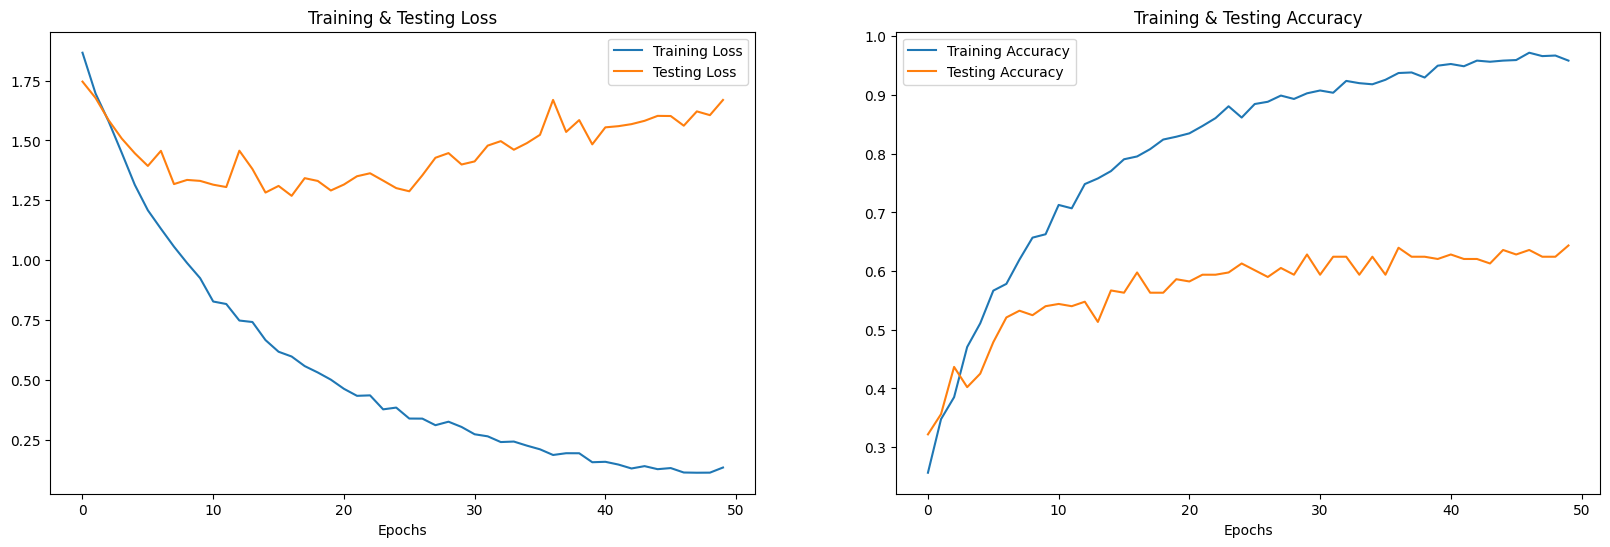

In [11]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

print_epochs = [i for i in range(epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(print_epochs , train_loss , label = 'Training Loss')
ax[0].plot(print_epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(print_epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(print_epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [12]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [13]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,N,S
1,P,P
2,N,N
3,N,N
4,J,J
5,N,N
6,T,N
7,P,P
8,P,P
9,D,D


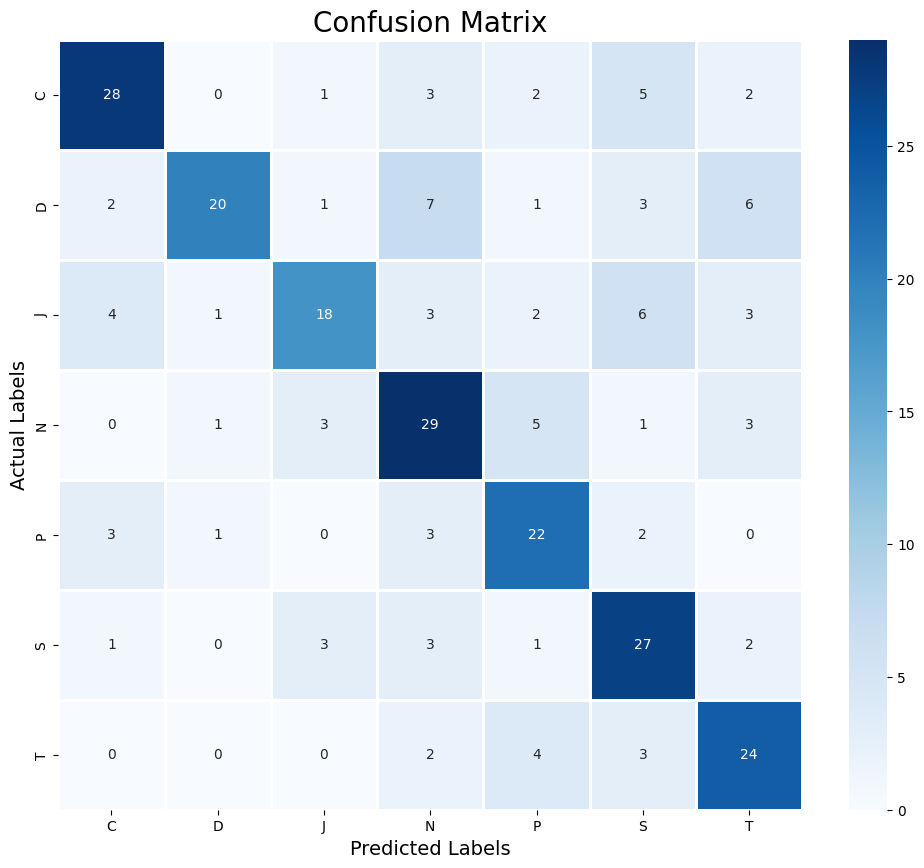

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.74      0.68      0.71        41
           D       0.87      0.50      0.63        40
           J       0.69      0.49      0.57        37
           N       0.58      0.69      0.63        42
           P       0.59      0.71      0.65        31
           S       0.57      0.73      0.64        37
           T       0.60      0.73      0.66        33

    accuracy                           0.64       261
   macro avg       0.66      0.65      0.64       261
weighted avg       0.67      0.64      0.64       261



In [17]:
import pickle

with open('../artifacts/model.pkl', 'wb') as file:
  pickle.dump(model, file)
print("Model saved as model.pkl")

Model saved as model.pkl
